In [1]:
!pip install pandas matplotlib nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('jobs_sample.csv')
print("Sample shape:", df.shape)
df.head(3)

Saving jobs_sample.csv to jobs_sample.csv
Sample shape: (1000, 4)


,job_title,organization,location,job_description
0,Junior Sales Manager Job in San Diego,Advertising and PR Services;Staffing/Employmen...,"San Diego, CA 92123",The Job Window has an exciting opening for a J...
1,Field Service Engineer Job in Miami,Biotechnology/PharmaceuticalsManufacturing - O...,"Miami, FL 33101",Beckman Coulter Diagnostics Field Service Engi...
2,Registered Nurse - ICU Full Time Days - Kindre...,Healthcare Services,Registered Nurse - ICU Full Time Days - Kindre...,Registered Nurse - ICU Full Time Days - Kindre...


 # Exploratory Data Analysis (EDA)


In [8]:
print("Total postings:", len(df))
print("Unique job titles:", df['job_title'].nunique())
print("Unique organizations:", df['organization'].nunique())
print("Unique locations:", df['location'].nunique())

Total postings: 1000
Unique job titles: 951
Unique organizations: 137
Unique locations: 750


In [9]:
df['desc_len'] = df['job_description'].str.len()
print(df['desc_len'].describe())

count     1000.000000
mean      2585.780000
std       1780.811741
min        121.000000
25%       1424.250000
50%       2230.000000
75%       3319.500000
max      16100.000000
Name: desc_len, dtype: float64


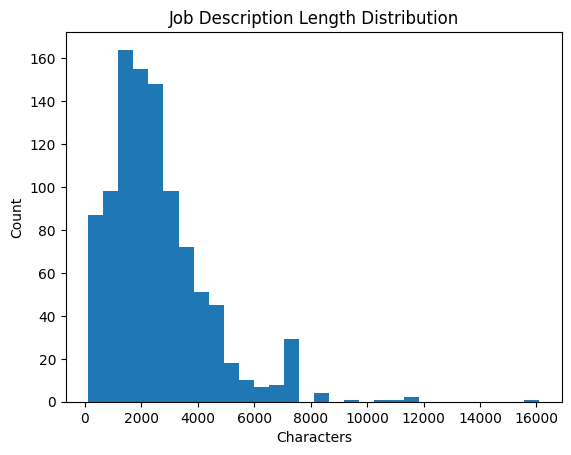

In [10]:
plt.hist(df['desc_len'], bins=30)
plt.title("Job Description Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-19-3774173495.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


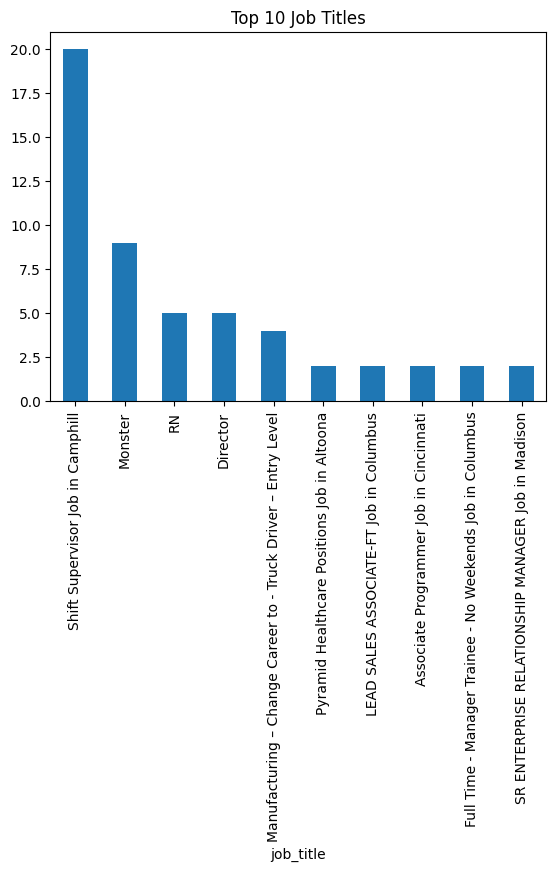

In [19]:
top_titles = df['job_title'].value_counts().nlargest(10)
top_titles.plot.bar(rot=90, title="Top 10 Job Titles")
plt.tight_layout()
plt.show()

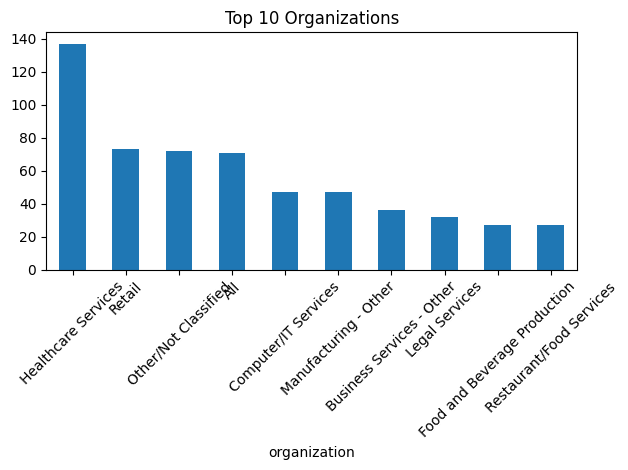

In [20]:
top_orgs = df['organization'].value_counts().nlargest(10)
top_orgs.plot.bar(rot=45, title="Top 10 Organizations")
plt.tight_layout()
plt.show()

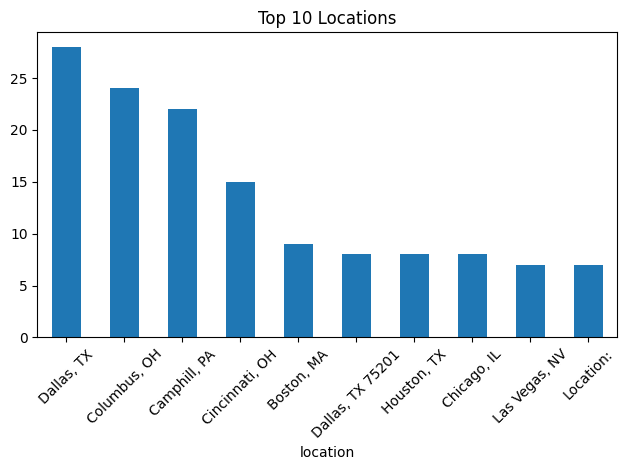

In [13]:
top_locs = df['location'].value_counts().nlargest(10)
top_locs.plot.bar(rot=45, title="Top 10 Locations")
plt.tight_layout()
plt.show()

In [21]:
# NLP için
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Kısaltmalar
synonyms = {
    'dev': 'developer',
    'sr': 'senior',
    'jr': 'junior'
}

def clean_text(text):
    text = text.lower().strip()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = text.split()
    # Remove stopwords and short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    # Normalize synonyms
    tokens = [synonyms.get(t, t) for t in tokens]
    return ' '.join(tokens)


In [22]:
df['clean_description'] = df['job_description'].apply(clean_text)
df[['job_title','clean_description']].head(3)

,job_title,clean_description
0,Junior Sales Manager Job in San Diego,job window exciting opening junior sale manage...
1,Field Service Engineer Job in Miami,beckman coulter diagnostics field service engi...
2,Registered Nurse - ICU Full Time Days - Kindre...,registered nurse icu full time day kindred hos...


In [23]:
df.to_csv('jobs_sample_cleaned.csv', index=False)
print("Saved cleaned sample to jobs_sample_cleaned.csv")

Saved cleaned sample to jobs_sample_cleaned.csv
